# Árvore de classificação
___

&nbsp;
**Um overview desse estudo:**
1. Instalação dos pacotes utilizados
2. Obtenção e conhecimento dos dados
3. Preparação dos dados para o modelo
4. Investigando os dados  
   4.1. Relação entre sobreviventes, sexo e faixa etária
5. Segmentação dos conjuntos de target, features, treino e teste
6. Elaboração do modelo
7. Verificando a acurácia do modelo
8. Obtenção do gráfico da árvore de classificação


**Objetivo:** Estimar a chance de um tripulante do Titanic ter sido sobrevivente dispondo de dados reais.

No náufragio do navio mais moderno para sua época, em 15 de abril de 1912, não haviam botes salva-vidas suficientes para socorrer toda a tripulação. 1502 pessoas de todas as 2224 não resistiram. Os protocolos de triagem para a ocupação dos botes, orientaram restrições como crianças e mulheres primeiro. Outros aspectos, como a classe econômica possivelmente influenciaram a sorte dos tripulantes. Os registros reais da tripulação do Titanic possibilitam investigar a importância desses aspectos na chance de sobrevivência. 

A relação das variáveis disponíveis está indicada juntamente com as respectivas referências na lista abaixo.

* survived and alive: Sobrevivente ou não
* pclass and class: Classe do Passageiro  
* sex (male, female): Sexo
* age: Idade
* sibsp: Número de irmãos e esposa à bordo
* parch: Número de pais e filhos à bordo
* fare: Preço da passagem em libras
* embarked: Cidade de embarque (Cherbourg, Queenstown ou Southampton)
* adult_male: pessoa do sexo masculino maior de 16 anos
* deck: Qual deck a cabine do passageiro se situava
* alone: tripulante viajando sozinho


## 1. Instalando os pacotes

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns


## 2.Obtendo e conhecendo os dados


In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.shape

(891, 15)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 3. Preparando os dados para o modelos

In [6]:
#Selecionando as features
titanic.drop(['class', 'alive', 'who', 'adult_male', 'embark_town', 'deck'], axis=1, inplace=True)

In [7]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64

In [8]:
#Removendo null values
titanic.dropna(inplace=True)

In [9]:
titanic.shape

(712, 9)

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [11]:
#Convertendo inputs da variável 'age' em 0 ou 1
titanic['female'] = titanic['sex'].map({'female': 1, 'male': 0})
titanic.drop('sex', axis=1, inplace=True)

#convertendo a variável 'embarked' em dummies
embarked_dummies = pd.get_dummies(titanic['embarked'], prefix='embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.drop('embarked', axis=1, inplace=True)

In [12]:
titanic['alone'].value_counts()

True     402
False    310
Name: alone, dtype: int64

In [13]:
#convertendo booleans da variável 'alone' em inteiros
titanic['alone'] = titanic['alone']*1

In [14]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,alone,female,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,0,1


## 4. Insvestigando os dados

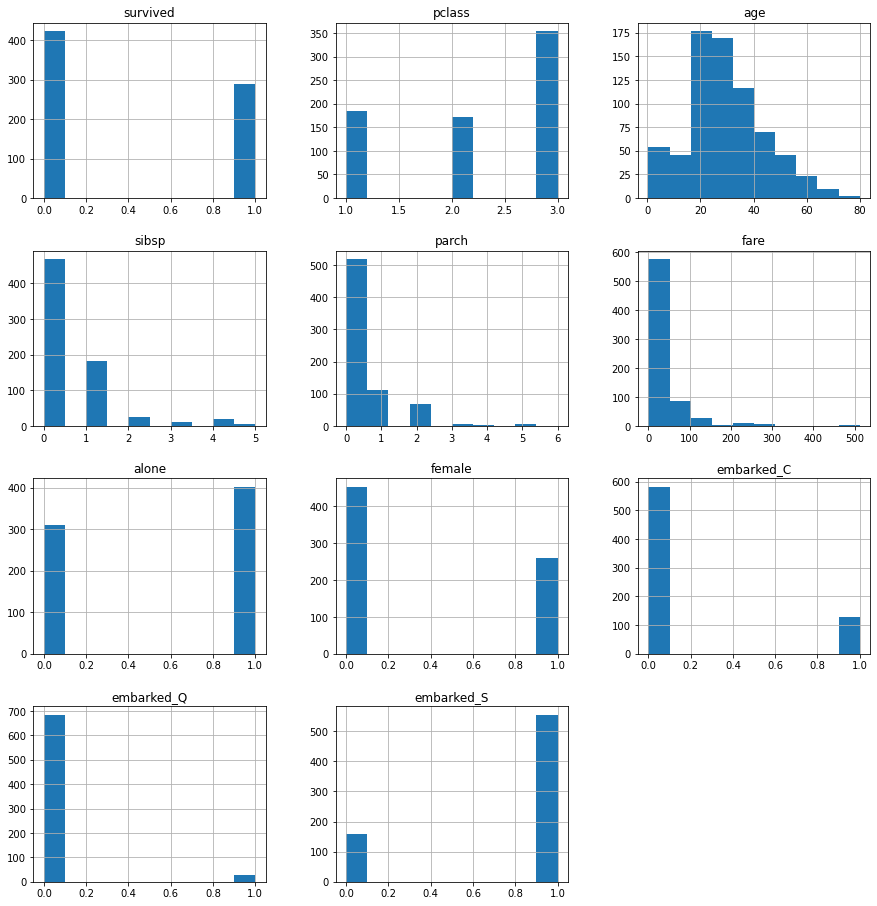

In [15]:
#plotando os histogramas das variáveis 
titanic.hist(layout=(5,3), figsize=(15,20));

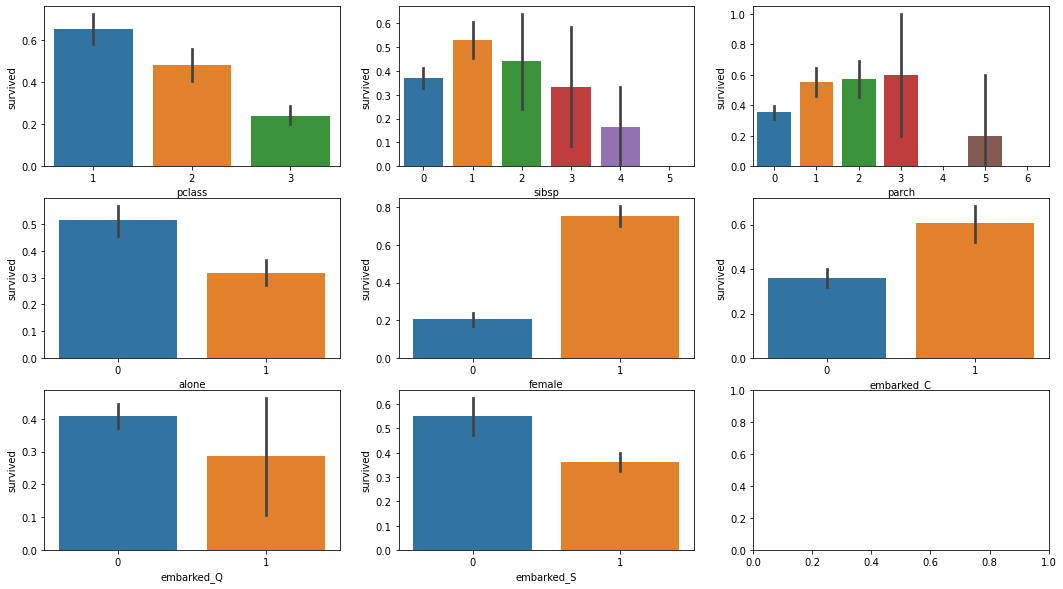

In [16]:
fig, axes = plt.subplots(3,3, figsize=(18, 10))

 #ax = plt.Axes(fig, [0., 0., 1., 1.])
  #  ax.set_axis_off()
   # fig.add_axes(ax)

sns.barplot(ax=axes[0, 0], data=titanic, x='pclass', y='survived')
sns.barplot(ax=axes[0, 1], data=titanic, x='sibsp', y='survived')
sns.barplot(ax=axes[0, 2], data=titanic, x='parch', y='survived')
sns.barplot(ax=axes[1, 0], data=titanic, x='alone', y='survived')
sns.barplot(ax=axes[1, 1], data=titanic, x='female', y='survived')
sns.barplot(ax=axes[1, 2], data=titanic, x='embarked_C', y='survived')
sns.barplot(ax=axes[2, 0], data=titanic, x='embarked_Q', y='survived')
sns.barplot(ax=axes[2, 1], data=titanic, x='embarked_S', y='survived');

### 4.1. Investigando a relação entre sobreviventes, sexo e faixa etária 

In [17]:
#categorizando a variável contínua 'age' 
bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110','110-120']

titanic['age_range'] = pd.cut(titanic.age, bins, labels=labels, include_lowest = True)

pd.value_counts(titanic.age_range)

20-30      230
30-40      154
10-20      115
40-50       86
0-10        64
50-60       42
60-70       16
70-80        5
80-90        0
90-100       0
100-110      0
110-120      0
Name: age_range, dtype: int64

In [18]:
#agrupando somente pela relação entre sobreviventes e sexo

titanic[['female', 'survived']].groupby(['female']).mean()

,survived
female,
0,0.205298
1,0.752896


In [19]:
#agrupando pelas relações entre sobreviventes, sexo e faixa etária
sex_age=titanic[['female', 'survived','age_range']].groupby(['female','age_range']).sum()

sex_age=sex_age.dropna() #removendo null values

sex_age.head()

survived
female age_range          
0      0-10             19
       10-20            10
       20-30            23
       30-40            23
       40-50            12

In [20]:
####Separando os sobreviventes femininos do data frame que inclui ambos os sexos 

#removendo todas as observações referentes aos sobreviventes masculinos
female_age=sex_age.drop([0],axis=0)

#alterando o nome genérico da variável 'survived' para sobreviventes femininos ('female_survived')
female_age['female_survived']=female_age['survived']

#removenndo as variáveis 'female' e 'survived'
female_age=female_age.reset_index() #Removendo as colunas 'sex' and 'age_range' como index
female_age.drop(['female','survived'], axis=1, inplace=True)

#Redefinindo o index
female_age.set_index('age_range', inplace = True)

female_age.head()

,female_survived
age_range,
0-10,19
10-20,34
20-30,61
30-40,45
40-50,21


In [21]:
# O mesmo foi feito para definir o dataframe referente aos sobreviventes masculinos conforme a faixa etária
male_age=sex_age.drop([1],axis=0)

male_age['male_survived']=male_age['survived'];

male_age=male_age.reset_index()
male_age.drop(['female','survived'], axis=1, inplace=True)

male_age.set_index('age_range', inplace = True)

male_age.head()

,male_survived
age_range,
0-10,19
10-20,10
20-30,23
30-40,23
40-50,12


In [22]:
#Unindo ambos os dataframes
sex_age=pd.concat(objs=[female_age, male_age],  axis=1)

sex_age.head()

,female_survived,male_survived
age_range,,
0-10,19,19
10-20,34,10
20-30,61,23
30-40,45,23
40-50,21,12


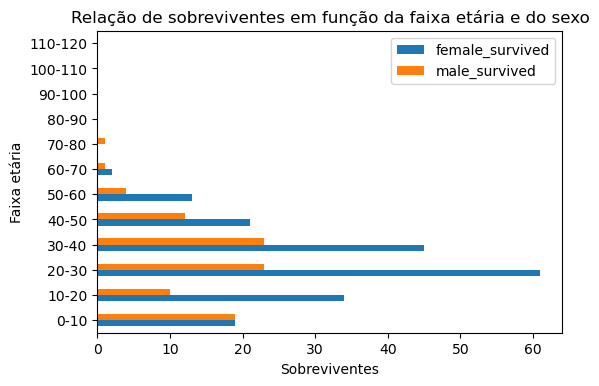

In [24]:
#Plotando o gráfico para verificar a relação de sobreviventes com a faixa etária e o sexo
sex_age.plot(kind='barh')
plt.title('Relação de sobreviventes em função da faixa etária e do sexo')
plt.xlabel('Sobreviventes')
plt.ylabel('Faixa etária')

mpl.rcParams['figure.dpi'] = 100;

In [25]:
titanic=titanic.drop(['age_range'],axis=1)

## 5. Segmentando os conjuntos target e features e seus subconjuntos treino e teste

In [26]:
#Separando a target
y = titanic.survived

In [27]:
#Separando as features 
X = titanic.drop('survived', axis=1)

In [28]:
#Separando os subconjuntos treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=123)

In [29]:
X_train.shape

(534, 10)

In [30]:
y_train.shape

(534,)

## 6. Elaborando e avaliando o modelo

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## 7. Verificando a acurácia do modelo

In [32]:
#verificando a acurácia do modelo na base de treino
print(f"Acurácia de treino do modelo de Árvore de Classificação: {round(tree.score(X_train, y_train) * 100, 2)}")

Acurácia de treino do modelo de Árvore de Classificação: 82.21


In [33]:
# verificando a acurácia na base de teste
acc_tree_test = round(tree.score(X_test, y_test) * 100, 2)
print("Acurácia de teste do modelo de Árvore de Decisão: {}".format(acc_tree_test))

Acurácia de teste do modelo de Árvore de Decisão: 78.09


## 8. Plotando a árvore de classificação

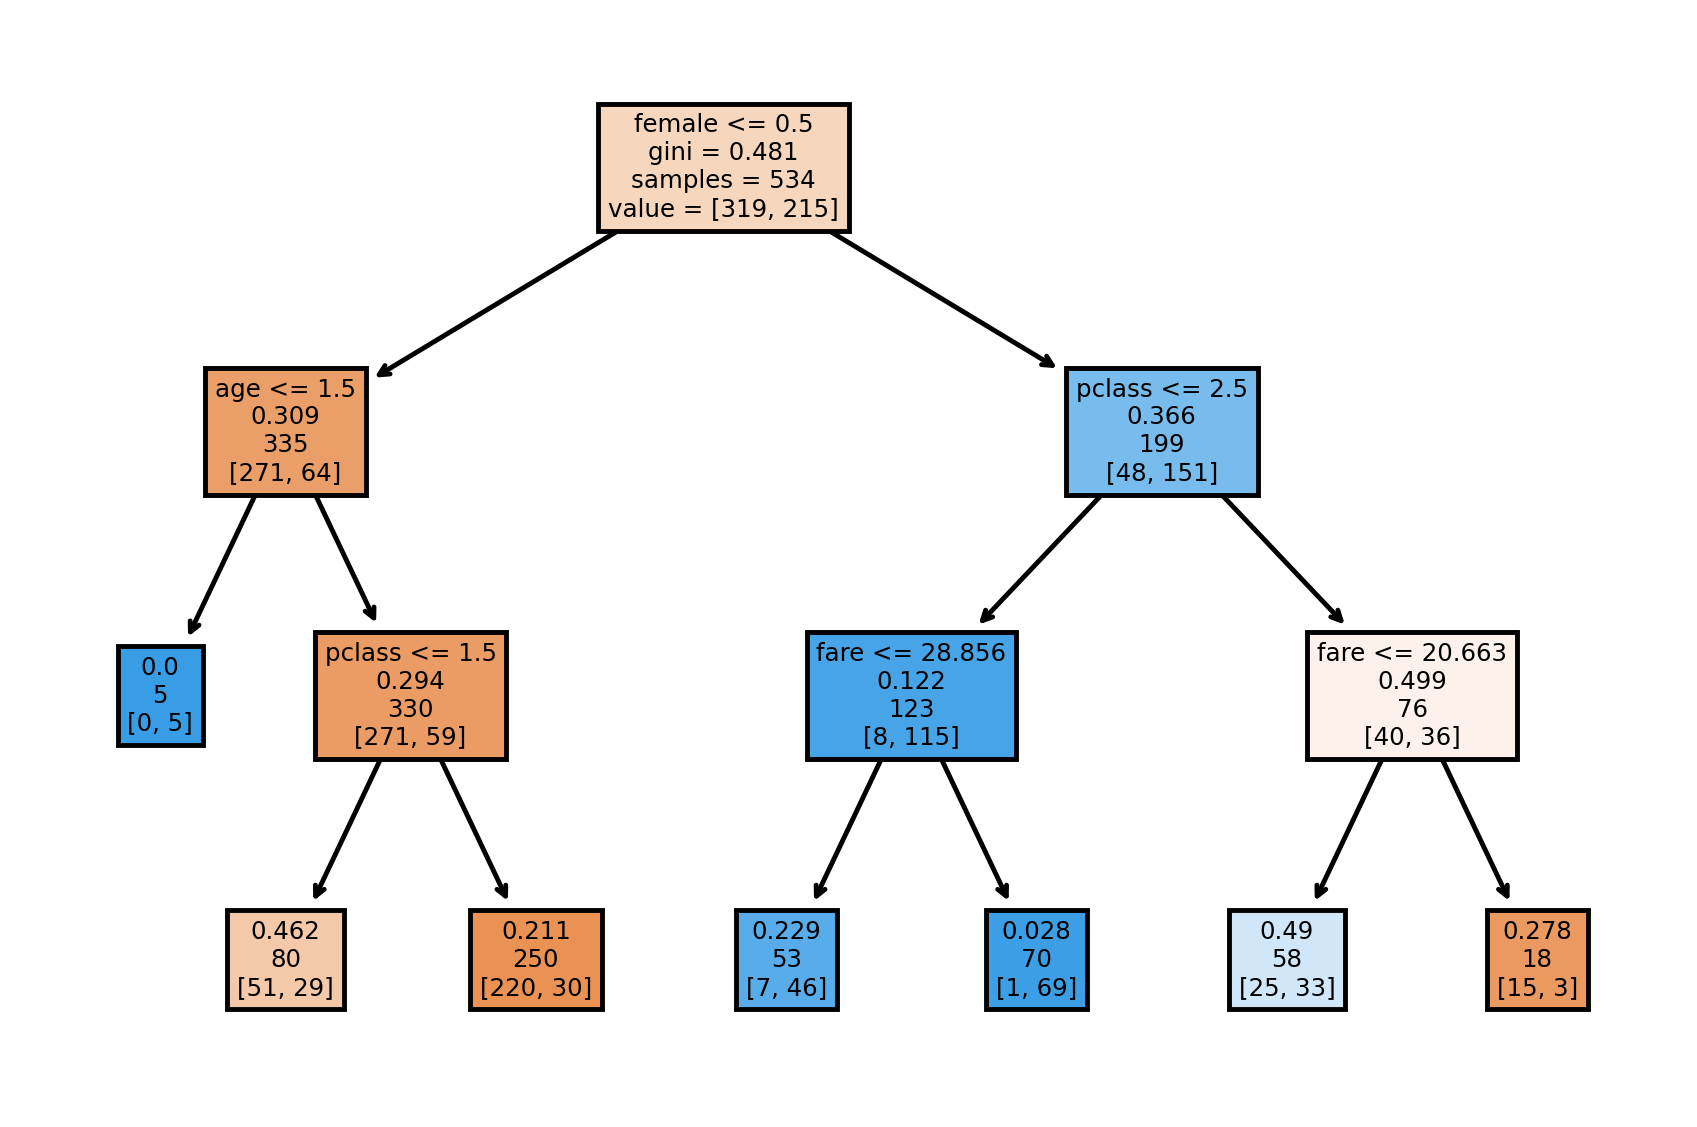

In [34]:
mpl.rcParams['figure.dpi'] = 350

features=['pclass','age','sibsp','parch','fare','alone','female','Embarked_C','Embarked_Q','Embarked_S']

plt.figure()
plot_tree(tree,feature_names=features, label='root', filled=True)
plt.show()
